In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats
from statsmodels.stats.stattools import durbin_watson
import statsmodels.stats.api as sms

In [67]:
def Y_imit(X, Yideal, v, n = 20, b = None):
    if b == None:
        b = [0]*len(X)
    #b - сдвиг
    Yimit = []
    for i in range(n):
        Yimit.append(Yideal[i]+v[i]*sps.norm.ppf(np.random.random())+b[i])
    return Yimit

In [68]:
X = np.arange(1,31) #последовательность 1, 2, ..., 30
Yideal = []
a = 5
for i in range(30):
    Yideal.append(X[i] + a) #X+a

In [104]:
a_coef, b_coef, pred_30, r2, F, dw, GQ = [], [], [], [], [], [], []
v = [4]*20
for i in range(10000):
    Yimit = Y_imit(X, Yideal, v)
    df = pd.DataFrame({'X': X[:20], 
              'Yideal':Yideal[:20], 
              'Yimit': Yimit[:20], 
              'v': v})
    Y = df['Yimit']
    X1 = df['X']
    X2 = sm.add_constant(X1)
    regression = sm.OLS(Y,X2).fit()
    y_pred = regression.predict(sm.add_constant(X))
    e = Yimit - y_pred[:20]
    a_coef.append(regression.params['const'])
    b_coef.append(regression.params['X'])
    pred_30.append(y_pred[29])
    r2.append(regression.rsquared)
    F.append(regression.fvalue)
    dw.append(durbin_watson(e))
    GQ.append(sms.het_goldfeldquandt(e, X2.values)[0])

In [114]:
#Результат
pd.DataFrame({'b': [np.mean(b_coef), np.std(b_coef)], 
                                       'a': [np.mean(a_coef), np.std(a_coef)], 
                                       'Y(30)^': [np.mean(pred_30), np.std(pred_30)], 
                                       'R2': [np.mean(r2), np.std(r2)], 
                                       'F': [np.mean(F), np.std(F)], 
                                       'GQ': [np.mean(GQ), np.std(GQ)], 
                                       'DW': [np.mean(dw), np.std(dw)]}, index = ['mean', 'std'])

,b,a,Y(30)^,R2,F,GQ,DW
mean,0.998663,5.025049,34.984953,0.694964,47.563574,1.329575,2.105298
std,0.153788,1.845471,3.126918,0.095571,23.483679,1.269505,0.419745


(array([  24.,  280., 1095., 2375., 2978., 2164.,  894.,  176.,   14.]),
 array([0.65548579, 0.98518334, 1.31488088, 1.64457843, 1.97427598,
        2.30397353, 2.63367108, 2.96336863, 3.29306617, 3.62276372]),
 <BarContainer object of 9 artists>)

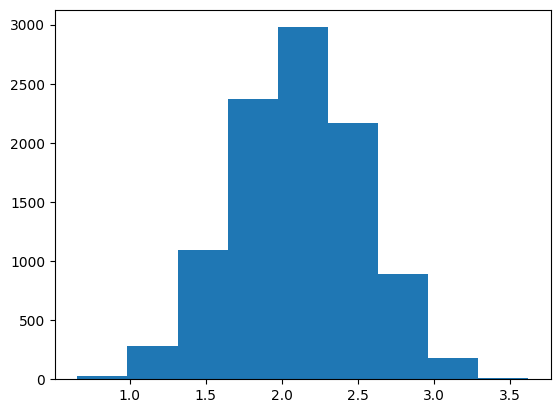

In [109]:
plt.hist(dw, bins = np.linspace(np.min(dw), np.max(dw), 10))